In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data processing, metrics and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt 
# Suppr warning
import warnings
warnings.filterwarnings("ignore")

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [21]:
train = pd.read_csv('data_products_train.csv')
test = pd.read_csv('data_products_test.csv')

In [22]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	8
Entradas:	12000


In [23]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

category                       object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

,category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,59.0,1064.0,1.0,200.0,16.0,8.0,11.0
1,esporte_lazer,43.0,843.0,3.0,1067.0,20.0,7.0,15.0
2,brinquedos,32.0,141.0,2.0,2690.0,39.0,24.0,40.0
3,brinquedos,47.0,406.0,3.0,1875.0,35.0,23.0,28.0
4,beleza_saude,50.0,757.0,1.0,600.0,74.0,15.0,15.0


In [24]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

product_photos_qty            0.021500
product_length_cm             0.020167
product_name_lenght           0.019583
product_width_cm              0.019500
product_height_cm             0.019417
product_description_lenght    0.018667
product_weight_g              0.018417
category                      0.000000
dtype: float64

In [25]:
train.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,11765.000000,11776.000000,11742.000000,11779.000000,11758.000000,11767.000000,11766.000000
mean,48.975436,802.878482,2.095214,2019.026827,32.019816,15.807343,23.316930
std,10.143948,664.000839,1.696089,3870.850412,17.738056,12.011844,11.949352
min,5.000000,8.000000,1.000000,0.000000,8.000000,2.000000,7.000000
25%,43.000000,346.000000,1.000000,300.000000,19.000000,8.000000,15.000000
50%,52.000000,621.000000,1.000000,750.000000,26.000000,13.000000,20.000000
75%,57.000000,1015.000000,3.000000,1750.000000,40.000000,20.000000,30.000000
max,69.000000,3985.000000,18.000000,40425.000000,105.000000,105.000000,118.000000


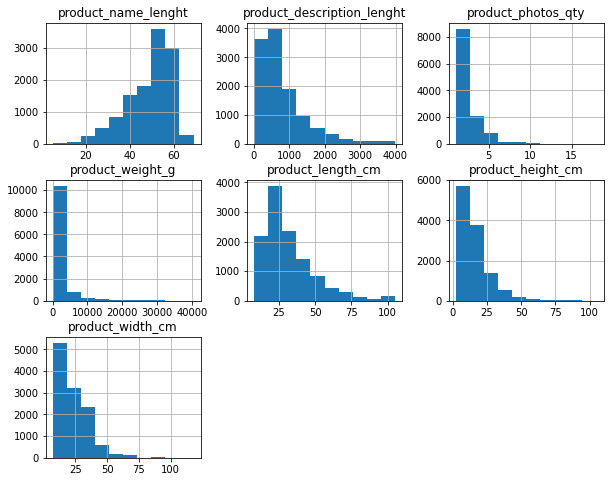

In [26]:
train.hist(figsize=(10,8));

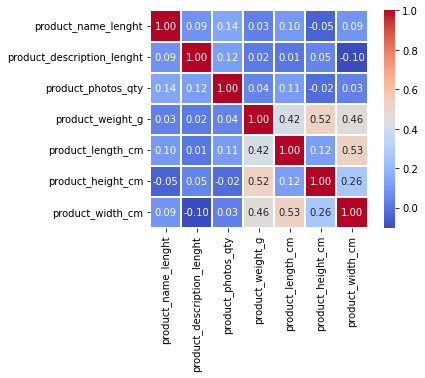

In [27]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [28]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (15000 x 8)


In [29]:
df_merged

,category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,59.0,1064.0,1.0,200.0,16.0,8.0,11.0
1,esporte_lazer,43.0,843.0,3.0,1067.0,20.0,7.0,15.0
2,brinquedos,32.0,141.0,2.0,2690.0,39.0,24.0,40.0
3,brinquedos,47.0,406.0,3.0,1875.0,35.0,23.0,28.0
4,beleza_saude,50.0,757.0,1.0,600.0,74.0,15.0,15.0
...,...,...,...,...,...,...,...,...
14995,beleza_saude,45.0,376.0,3.0,800.0,16.0,16.0,16.0
14996,informatica_acessorios,55.0,328.0,1.0,400.0,28.0,10.0,23.0
14997,informatica_acessorios,41.0,374.0,1.0,611.0,NaN,NaN,NaN
14998,beleza_saude,29.0,870.0,1.0,185.0,23.0,24.0,22.0


In [30]:
# Usando a média para valores float
for c in df_merged.columns:
    if df_merged[c].dtype=='float16' or  df_merged[c].dtype=='float32' or  df_merged[c].dtype=='float64':
        df_merged[c].fillna(df_merged[c].mean())

In [31]:
df_merged['product_name_lenght'] = df_merged['product_name_lenght'].fillna(df_merged['product_name_lenght'].mean())
df_merged['product_description_lenght'] = df_merged['product_description_lenght'].fillna(df_merged['product_description_lenght'].mean())
df_merged['product_photos_qty'] = df_merged['product_photos_qty'].fillna(df_merged['product_photos_qty'].mean())
df_merged['product_weight_g'] = df_merged['product_weight_g'].fillna(df_merged['product_weight_g'].mean())
df_merged['product_length_cm'] = df_merged['product_length_cm'].fillna(df_merged['product_length_cm'].mean())
df_merged['product_height_cm'] = df_merged['product_height_cm'].fillna(df_merged['product_height_cm'].mean())
df_merged['product_width_cm'] = df_merged['product_width_cm'].fillna(df_merged['product_width_cm'].mean())

In [32]:
df_merged.isnull().sum()

category                      0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
df_merged

,category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,59.0,1064.0,1.0,200.0,16.000000,8.000000,11.000000
1,esporte_lazer,43.0,843.0,3.0,1067.0,20.000000,7.000000,15.000000
2,brinquedos,32.0,141.0,2.0,2690.0,39.000000,24.000000,40.000000
3,brinquedos,47.0,406.0,3.0,1875.0,35.000000,23.000000,28.000000
4,beleza_saude,50.0,757.0,1.0,600.0,74.000000,15.000000,15.000000
...,...,...,...,...,...,...,...,...
14995,beleza_saude,45.0,376.0,3.0,800.0,16.000000,16.000000,16.000000
14996,informatica_acessorios,55.0,328.0,1.0,400.0,28.000000,10.000000,23.000000
14997,informatica_acessorios,41.0,374.0,1.0,611.0,32.105593,15.863958,23.363124
14998,beleza_saude,29.0,870.0,1.0,185.0,23.000000,24.000000,22.000000


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [35]:
colunas = ['product_name_lenght', 'product_description_lenght','product_photos_qty', 'product_weight_g', 'product_length_cm',
           'product_height_cm', 'product_width_cm']

In [36]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [37]:
X_train = train.loc[:, colunas].values
y_train = train.loc[:, 'category'].values

In [38]:
X_test = test.loc[:, colunas].values
y_test = test.loc[:, 'category'].values

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [41]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from matplotlib import pyplot
from numpy import mean

In [42]:
svm = SVC()
dt  = tree.DecisionTreeClassifier()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
adb = AdaBoostClassifier()
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
xgb = xgb.XGBClassifier()
sdg = SGDClassifier()
atr = DecisionTreeRegressor()
atc = DecisionTreeClassifier()
lg =  LogisticRegression()

In [43]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size=0.15,random_state=65)

In [44]:
# Visualizando a quantidade de linhas dos conjuntos criados acima
print ('X_train: numero de linhas e colunas: {}'.format(X_treino.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_teste.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_treino.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_teste.shape))

X_train: numero de linhas e colunas: (17153, 7)
X_test: numero de linhas e colunas: (3027, 7)
y_train: numero de linhas e colunas: (17153,)
y_test: numero de linhas e colunas: (3027,)


In [45]:
rf.fit(X_treino, y_treino)

RandomForestClassifier()

In [46]:
print (metrics.classification_report(y_teste,rf.predict(X_teste)))

                        precision    recall  f1-score   support

     alimentos_bebidas       0.90      0.99      0.95       293
            automotivo       0.72      0.58      0.64       311
          beleza_saude       0.55      0.63      0.59       289
            brinquedos       0.60      0.67      0.64       301
       cama_mesa_banho       0.76      0.83      0.80       331
         esporte_lazer       0.59      0.46      0.51       303
informatica_acessorios       0.63      0.59      0.61       299
      moveis_decoracao       0.73      0.61      0.67       295
              pet_shop       0.74      0.79      0.77       295
             telefonia       0.77      0.88      0.82       310

              accuracy                           0.70      3027
             macro avg       0.70      0.70      0.70      3027
          weighted avg       0.70      0.70      0.70      3027



In [47]:
atc.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [48]:
print (metrics.classification_report(y_teste,atc.predict(X_teste)))

                        precision    recall  f1-score   support

     alimentos_bebidas       0.85      0.92      0.88       293
            automotivo       0.49      0.48      0.49       311
          beleza_saude       0.44      0.43      0.43       289
            brinquedos       0.52      0.54      0.53       301
       cama_mesa_banho       0.81      0.73      0.77       331
         esporte_lazer       0.42      0.39      0.41       303
informatica_acessorios       0.48      0.48      0.48       299
      moveis_decoracao       0.57      0.55      0.56       295
              pet_shop       0.58      0.65      0.62       295
             telefonia       0.76      0.75      0.76       310

              accuracy                           0.59      3027
             macro avg       0.59      0.59      0.59      3027
          weighted avg       0.59      0.59      0.59      3027



In [49]:
lg.fit(X_treino, y_treino)

LogisticRegression()

In [50]:
print (metrics.classification_report(y_teste,lg.predict(X_teste)))

                        precision    recall  f1-score   support

     alimentos_bebidas       0.17      0.03      0.05       293
            automotivo       0.20      0.03      0.05       311
          beleza_saude       0.23      0.32      0.27       289
            brinquedos       0.32      0.13      0.18       301
       cama_mesa_banho       0.27      0.73      0.40       331
         esporte_lazer       0.19      0.05      0.08       303
informatica_acessorios       0.13      0.06      0.08       299
      moveis_decoracao       0.18      0.12      0.15       295
              pet_shop       0.25      0.14      0.18       295
             telefonia       0.29      0.88      0.43       310

              accuracy                           0.25      3027
             macro avg       0.22      0.25      0.19      3027
          weighted avg       0.22      0.25      0.19      3027



In [51]:
# # criar um modelo de Regressão Logística
# lr_model = LogisticRegression(solver='liblinear')
# lr_model.fit(train, X_train)

# # verificar a acurácia do modelo
# acc_logReg = round(lr_model.score(train, X_train) * 100, 2)
# print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))